# Compressed sensing Theory

pip install cs1==0.2.1


## VAE-CS

Sampling
$$ xs = \Phi x ,\quad for \quad \Phi_{k*N}, k > （4 * non-sparsity） $$

Sparsity hypothesis
$$ x = \Psi z $$

Compressed Sensing
$$ x_s = \Phi \Psi z $$

Optimization (LASSO)
$$ minimize \quad  ||z||_1 $$
$$ s.t \quad     x_s = \Phi \Psi z $$

Reconstruction
$$ x = \Psi z $$

-----------

The function `vae_reconstruct()` solves the problem $$\operatorname{argmin}_z \|ΦG(z)-xs\|^2 重建误差 $$


where:  
* G(z)是解码器, G相当于变换基 Ψ, G(z)即Ψz，等于xr
* $x \in \mathbb R^n$ is the input signal.  
* $Φ$ is an $m\times n$ matrix with i.i.d $\mathcal N(0,\frac 1m)$ entries. 感知矩阵 Φ
* $\eta \in \mathbb R^m$ is a random Gaussian noise with i.i.d $\mathcal N(0,\frac{0.1}{\sqrt m})$ entries.
* $xs = Φx$ is the measurement vector.

We follow the same exact procedure as in the paper: sample $10$ random initial $z$'s and solve the problem for each initialization using Adam optimizer with learning rate $0.01$. Gradients are computed automatically using Pytorch's `autograd` library. We return the $z$ that yields lowest measurement error at the end.

Adding `requires_grad_(False)` on all the variables except `z` ensures that only `z` is being optimized on.


## Two flavors of the sensing matrix $Φ$

#### random binary sensing matrix vs. random Gaussian sensing matrix

" A sensing matrix maps input vector to measurement vector through linear wighted summation of input. What makes a specefic matrix good, is application dependent. Now, both distributions more or less satisfy RIP. However hardware implementation of the Bernoulli matrix (binary or bipolar) is much much easier especially in analog domain. A Bernoulli wight is either 0 or 1 (or -1/1 in case of polar Bernoulli), but a Gaussian wight is a floating point figure. Multiplication of a flouting point number either in digital or analog, is resource consuming, while multiplication of a Bernoulli wight is feasible through implementation of a simple switch in analog domain or and instruction in digital. "

--------

In [1]:
import cs1
cs1.__version__

'0.2.0'

# Hyper-parameters

## VAE Model Topology hparams: 

    batch_size: Used to create pytorch `DataLoader` objects. affact the training process.  
    h_dim1 : hidden layer 1 nodes  
    h_dim2 : hidden layer 2 nodes. set 0 if don't use this layer.    
    z_dim : the latent variable layer dimensionality  

These affect the model complexity / topology.  

## CS Reconstruction hparams: 

    lr : learning rate  
    regularization : regularization  
    iterations : gradient descent iterations  
    N : how many runs to construct each signal  
    k : sampling percentage  
    PHI_flavor : 'gaussian' or 'bernoulli'  
    add_noise : whether add white noise

These are reconstruction hyper-parameters



# Construct and train two VAE models

Optional: sum binning to reduce dataset dim 

```
from qsi.io import pre
X, X_names = pre.x_binning(X, X_names, target_dim = 0.1, flavor = 'sum', display = False)
```

load dataset from 7345.csv
Use classes: [0, 3], remapped to [0, 1]
X.shape (153, 5924)  y.shape (153,)


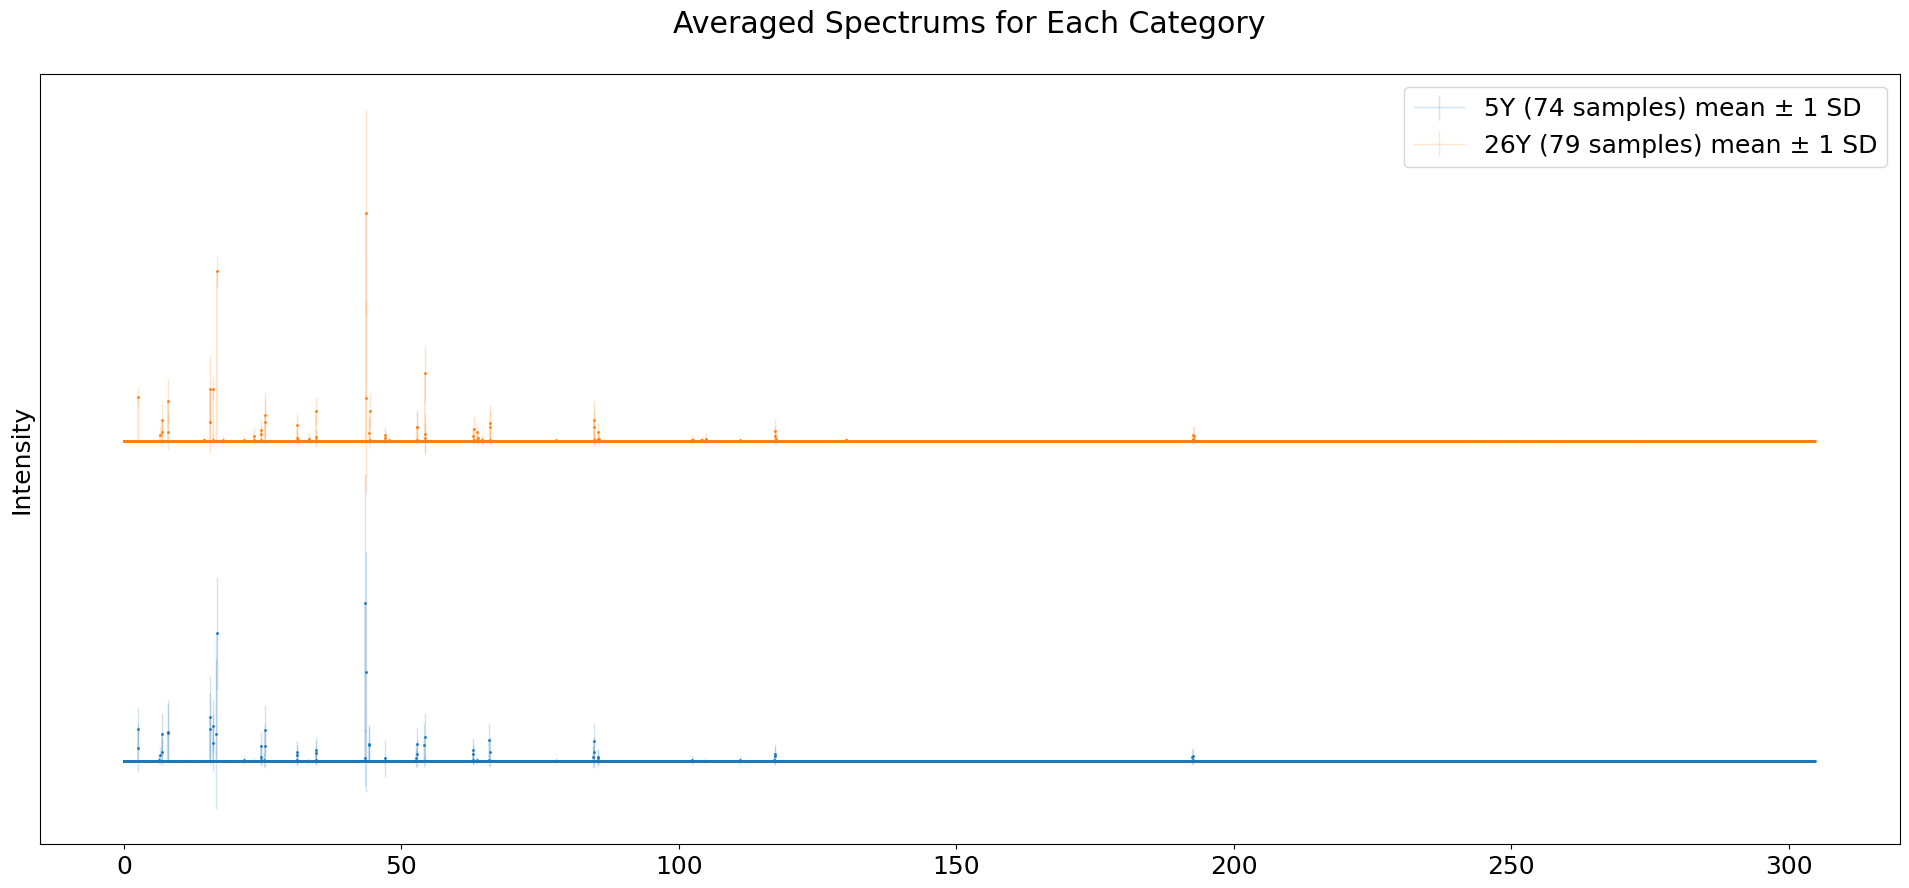

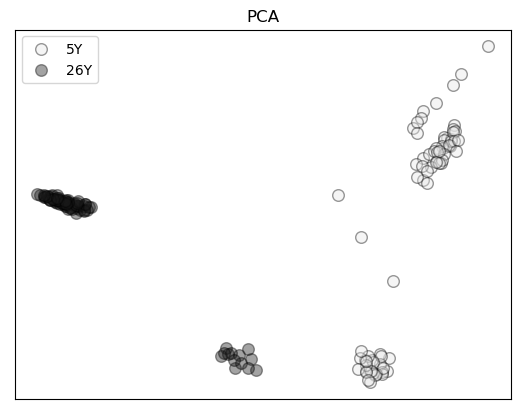

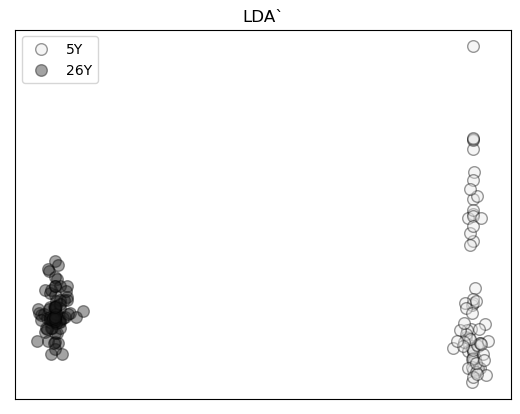

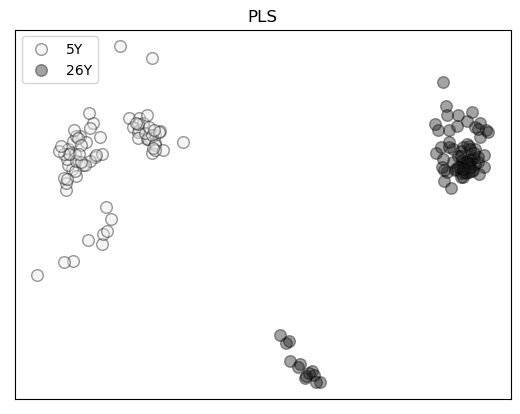

古井贡酒不同年份白酒 SPI-MS of Gujing Tribute wine of different vintages

["5年","8年","16年","26年"]


LogisticRegressionCV score on entire dataset: 1.0
Train Epoch: 1 [0/122 (0%)]	Loss: 4116.893555
====> Epoch: 1 Average loss: 4025.2501
====> Test set loss: 3860.1789
Train Epoch: 2 [0/122 (0%)]	Loss: 3852.184326
====> Epoch: 2 Average loss: 3719.2893
====> Test set loss: 3523.7644
Train Epoch: 3 [0/122 (0%)]	Loss: 3478.257568
====> Epoch: 3 Average loss: 3325.6541
====> Test set loss: 2984.7089
Train Epoch: 4 [0/122 (0%)]	Loss: 2951.791260
====> Epoch: 4 Average loss: 2664.9821
====> Test set loss: 2086.6915
Train Epoch: 5 [0/122 (0%)]	Loss: 2098.423584
====> Epoch: 5 Average loss: 1741.9689
====> Test set loss: 1203.3808
Train Epoch: 6 [0/122 (0%)]	Loss: 945.578430
====> Epoch: 6 Average loss: 818.4123
====> Test set loss: 448.1770
Train Epoch: 7 [0/122 (0%)]	Loss: 264.396820
====> Epoch: 7 Average loss: 172.8135
====> Test set loss: 107.4443
Train Epoch: 8 [0/122 (0%)]	Loss: 46.554470
====> Epoch: 8 Average loss: 60.2653
====> Test set loss: 75.7788
Train Epoch: 9 [0/122 (0%)]	Loss: 

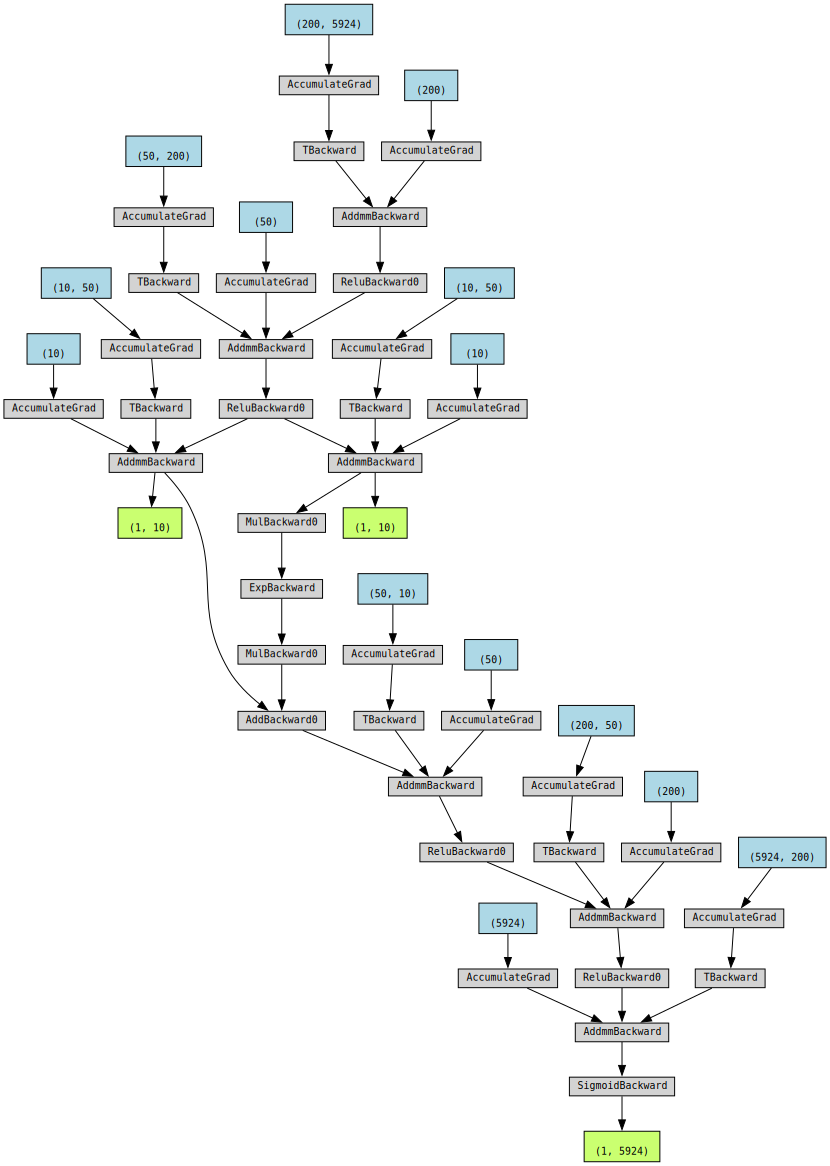

Train Epoch: 1 [0/122 (0%)]	Loss: 4151.927734
====> Epoch: 1 Average loss: 3957.2697
====> Test set loss: 3584.4246
Train Epoch: 2 [0/122 (0%)]	Loss: 3591.649170
====> Epoch: 2 Average loss: 3423.8660
====> Test set loss: 3064.2419
Train Epoch: 3 [0/122 (0%)]	Loss: 3082.903320
====> Epoch: 3 Average loss: 2885.5308
====> Test set loss: 2583.0658
Train Epoch: 4 [0/122 (0%)]	Loss: 2460.405518
====> Epoch: 4 Average loss: 2191.9174
====> Test set loss: 1951.3362
Train Epoch: 5 [0/122 (0%)]	Loss: 1895.028931
====> Epoch: 5 Average loss: 1547.1917
====> Test set loss: 1183.9662
Train Epoch: 6 [0/122 (0%)]	Loss: 1128.171265
====> Epoch: 6 Average loss: 896.7467
====> Test set loss: 580.1316
Train Epoch: 7 [0/122 (0%)]	Loss: 535.895325
====> Epoch: 7 Average loss: 381.2241
====> Test set loss: 278.9911
Train Epoch: 8 [0/122 (0%)]	Loss: 190.343399
====> Epoch: 8 Average loss: 151.1267
====> Test set loss: 137.3972
Train Epoch: 9 [0/122 (0%)]	Loss: 86.249405
====> Epoch: 9 Average loss: 77.4283

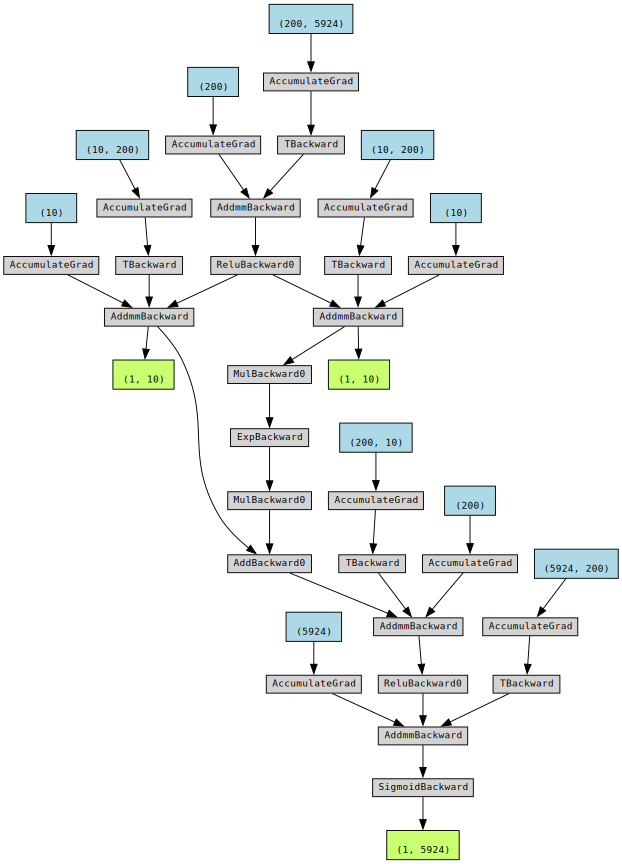

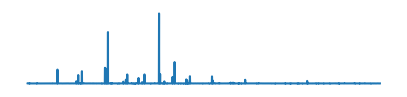

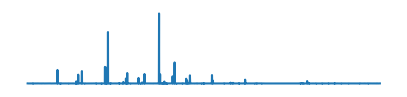

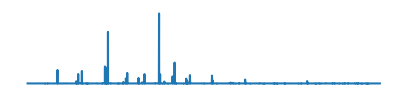

In [1]:
from cs1.basis.adaptive import vae
X, y, scaler, clf, model1, model2 = vae.build_vae('vintage2')

---

# Try VAE Model

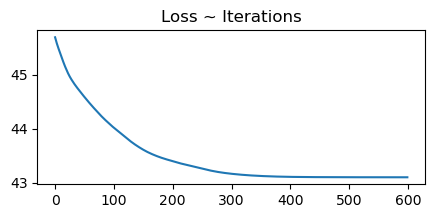

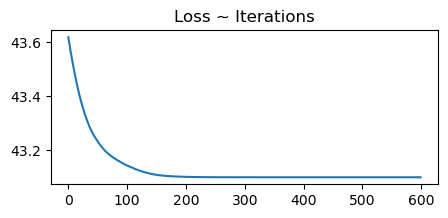

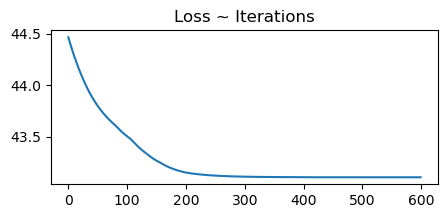

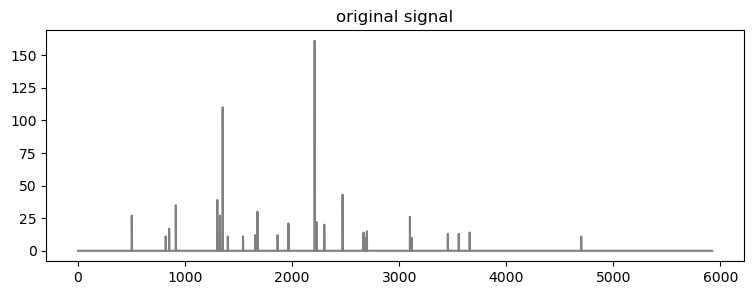

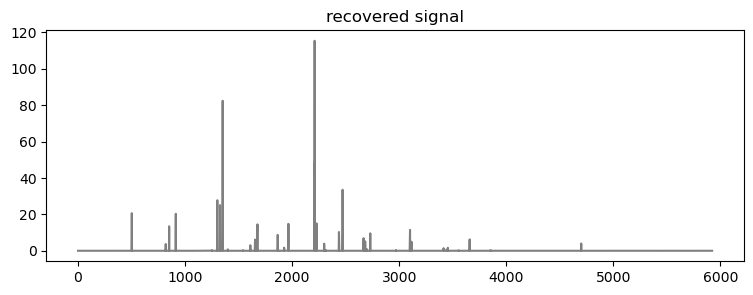

In [10]:
vae.VAE_Sensing_n_Recovery(model1, X[0], scaler = scaler, k = 0.1,
                            PHI_flavor = 'gaussian', 
                            add_noise = True, 
                            lr = 0.01, regularization = 0.1, 
                            iterations = 600, N = 3, debug_mode = True)

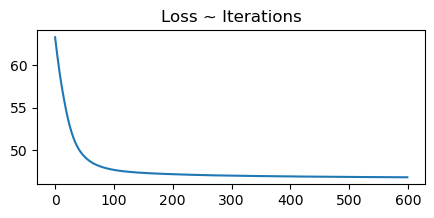

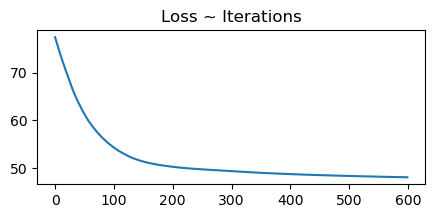

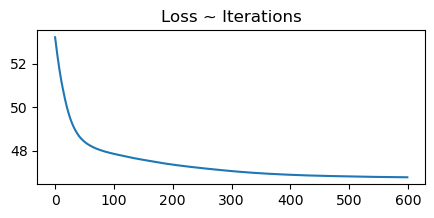

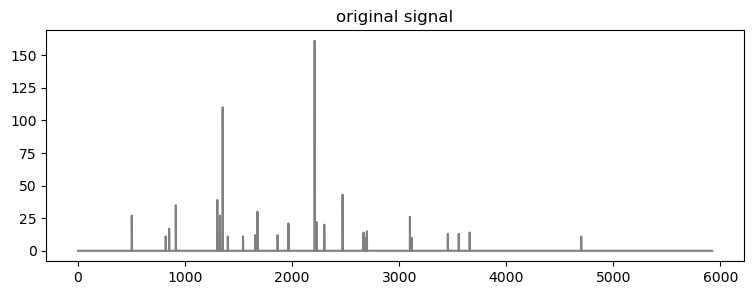

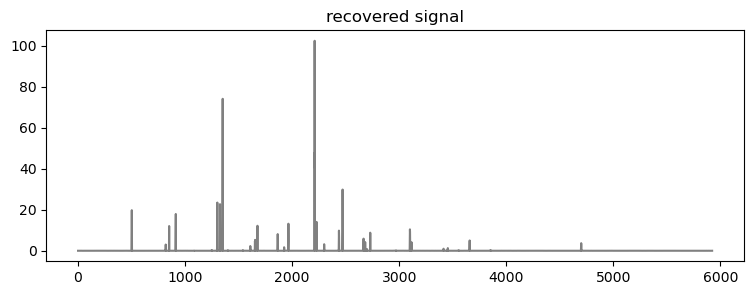

In [3]:
vae.VAE_Sensing_n_Recovery(model2, X[0], scaler = scaler, k = 0.1,
                            PHI_flavor = 'gaussian', 
                            add_noise = True, 
                            lr = 0.01, regularization = 0.1, 
                            iterations = 600, N = 3, debug_mode = True)

重建细节差别较为明显，基本考虑效果不会很理想。

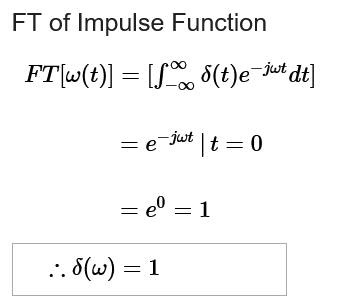


SPI MS数据的spike（Impulse function, 冲激函数）较多，在DCT/DFT等频域中为均匀谱/白色频谱，因此并不稀疏，不满足典型的CS要求。  
此外，后续的IDM的表现不差于DCT DFT，也证实了这点


# Hparam optimization using grid search strategy

## Round 1 - A rough search

In [4]:
dic, best_hparams, best_acc = vae.vae_cs_grid_search(model2, X, y,
ks = [0.001, 0.01, 0.1], 
PHI_flavors = ['gaussian', 'bernoulli'], 
add_noises = [False, True],
lrs = [0.01, 0.1],
regularizations = [0, 0.1, 1],
iterationss = [500],
Ns = [3])

LogisticRegressionCV score on entire dataset: 1.0

Grid Search Loop: 0.001 gaussian False 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [09:35<00:00,  3.76s/it]


Acc: 0.6928104575163399
Acc improved from 0 to 0.6928104575163399. Update best hparams : (0.001, 'gaussian', False, 0.01, 0, 500, 3)

Grid Search Loop: 0.001 gaussian False 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:34<00:00,  3.36s/it]


Acc: 0.45098039215686275

Grid Search Loop: 0.001 gaussian False 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:27<00:00,  3.32s/it]


Acc: 0.5032679738562091

Grid Search Loop: 0.001 gaussian False 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:26<00:00,  3.31s/it]


Acc: 0.7320261437908496
Acc improved from 0.6928104575163399 to 0.7320261437908496. Update best hparams : (0.001, 'gaussian', False, 0.1, 0, 500, 3)

Grid Search Loop: 0.001 gaussian False 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:23<00:00,  3.29s/it]


Acc: 0.5228758169934641

Grid Search Loop: 0.001 gaussian False 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:18<00:00,  3.26s/it]


Acc: 0.5294117647058824

Grid Search Loop: 0.001 gaussian True 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:16<00:00,  3.25s/it]


Acc: 0.6601307189542484

Grid Search Loop: 0.001 gaussian True 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:07<00:00,  3.19s/it]


Acc: 0.477124183006536

Grid Search Loop: 0.001 gaussian True 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:19<00:00,  3.26s/it]


Acc: 0.5816993464052288

Grid Search Loop: 0.001 gaussian True 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:13<00:00,  3.22s/it]


Acc: 0.7124183006535948

Grid Search Loop: 0.001 gaussian True 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:12<00:00,  3.22s/it]


Acc: 0.48366013071895425

Grid Search Loop: 0.001 gaussian True 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:07<00:00,  3.19s/it]


Acc: 0.46405228758169936

Grid Search Loop: 0.001 bernoulli False 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:27<00:00,  3.32s/it]


Acc: 0.5555555555555556

Grid Search Loop: 0.001 bernoulli False 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:26<00:00,  3.31s/it]


Acc: 0.49673202614379086

Grid Search Loop: 0.001 bernoulli False 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:26<00:00,  3.31s/it]


Acc: 0.5490196078431373

Grid Search Loop: 0.001 bernoulli False 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:16<00:00,  3.24s/it]


Acc: 0.5032679738562091

Grid Search Loop: 0.001 bernoulli False 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:25<00:00,  3.30s/it]


Acc: 0.5555555555555556

Grid Search Loop: 0.001 bernoulli False 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:24<00:00,  3.30s/it]


Acc: 0.4444444444444444

Grid Search Loop: 0.001 bernoulli True 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:20<00:00,  3.27s/it]


Acc: 0.5163398692810458

Grid Search Loop: 0.001 bernoulli True 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:18<00:00,  3.26s/it]


Acc: 0.5359477124183006

Grid Search Loop: 0.001 bernoulli True 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:13<00:00,  3.23s/it]


Acc: 0.5359477124183006

Grid Search Loop: 0.001 bernoulli True 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:19<00:00,  3.26s/it]


Acc: 0.5555555555555556

Grid Search Loop: 0.001 bernoulli True 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:19<00:00,  3.27s/it]


Acc: 0.5490196078431373

Grid Search Loop: 0.001 bernoulli True 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:18<00:00,  3.26s/it]


Acc: 0.45098039215686275

Grid Search Loop: 0.01 gaussian False 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:34<00:00,  3.36s/it]


Acc: 0.8431372549019608
Acc improved from 0.7320261437908496 to 0.8431372549019608. Update best hparams : (0.01, 'gaussian', False, 0.01, 0, 500, 3)

Grid Search Loop: 0.01 gaussian False 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:22<00:00,  3.28s/it]


Acc: 0.5424836601307189

Grid Search Loop: 0.01 gaussian False 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:22<00:00,  3.28s/it]


Acc: 0.4444444444444444

Grid Search Loop: 0.01 gaussian False 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:27<00:00,  3.32s/it]


Acc: 0.8823529411764706
Acc improved from 0.8431372549019608 to 0.8823529411764706. Update best hparams : (0.01, 'gaussian', False, 0.1, 0, 500, 3)

Grid Search Loop: 0.01 gaussian False 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:21<00:00,  3.28s/it]


Acc: 0.5555555555555556

Grid Search Loop: 0.01 gaussian False 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:18<00:00,  3.26s/it]


Acc: 0.5098039215686274

Grid Search Loop: 0.01 gaussian True 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:12<00:00,  3.22s/it]


Acc: 0.8431372549019608

Grid Search Loop: 0.01 gaussian True 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:14<00:00,  3.23s/it]


Acc: 0.5686274509803921

Grid Search Loop: 0.01 gaussian True 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:21<00:00,  3.28s/it]


Acc: 0.477124183006536

Grid Search Loop: 0.01 gaussian True 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:16<00:00,  3.25s/it]


Acc: 0.9019607843137255
Acc improved from 0.8823529411764706 to 0.9019607843137255. Update best hparams : (0.01, 'gaussian', True, 0.1, 0, 500, 3)

Grid Search Loop: 0.01 gaussian True 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:24<00:00,  3.30s/it]


Acc: 0.5947712418300654

Grid Search Loop: 0.01 gaussian True 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:18<00:00,  3.26s/it]


Acc: 0.5490196078431373

Grid Search Loop: 0.01 bernoulli False 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:20<00:00,  3.27s/it]


Acc: 0.5686274509803921

Grid Search Loop: 0.01 bernoulli False 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:18<00:00,  3.26s/it]


Acc: 0.5686274509803921

Grid Search Loop: 0.01 bernoulli False 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:16<00:00,  3.24s/it]


Acc: 0.5032679738562091

Grid Search Loop: 0.01 bernoulli False 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:21<00:00,  3.28s/it]


Acc: 0.5490196078431373

Grid Search Loop: 0.01 bernoulli False 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:17<00:00,  3.25s/it]


Acc: 0.6013071895424836

Grid Search Loop: 0.01 bernoulli False 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:12<00:00,  3.22s/it]


Acc: 0.5490196078431373

Grid Search Loop: 0.01 bernoulli True 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:13<00:00,  3.22s/it]


Acc: 0.5816993464052288

Grid Search Loop: 0.01 bernoulli True 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:19<00:00,  3.26s/it]


Acc: 0.5882352941176471

Grid Search Loop: 0.01 bernoulli True 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:22<00:00,  3.28s/it]


Acc: 0.5490196078431373

Grid Search Loop: 0.01 bernoulli True 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:17<00:00,  3.25s/it]


Acc: 0.5882352941176471

Grid Search Loop: 0.01 bernoulli True 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:21<00:00,  3.28s/it]


Acc: 0.5359477124183006

Grid Search Loop: 0.01 bernoulli True 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:24<00:00,  3.30s/it]


Acc: 0.49673202614379086

Grid Search Loop: 0.1 gaussian False 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:44<00:00,  3.43s/it]


Acc: 0.8562091503267973

Grid Search Loop: 0.1 gaussian False 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.43s/it]


Acc: 0.7320261437908496

Grid Search Loop: 0.1 gaussian False 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.43s/it]


Acc: 0.5424836601307189

Grid Search Loop: 0.1 gaussian False 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.43s/it]


Acc: 0.9607843137254902
Acc improved from 0.9019607843137255 to 0.9607843137254902. Update best hparams : (0.1, 'gaussian', False, 0.1, 0, 500, 3)

Grid Search Loop: 0.1 gaussian False 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.43s/it]


Acc: 0.8562091503267973

Grid Search Loop: 0.1 gaussian False 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.44s/it]


Acc: 0.5555555555555556

Grid Search Loop: 0.1 gaussian True 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:47<00:00,  3.45s/it]


Acc: 0.8496732026143791

Grid Search Loop: 0.1 gaussian True 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:47<00:00,  3.45s/it]


Acc: 0.7254901960784313

Grid Search Loop: 0.1 gaussian True 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:47<00:00,  3.45s/it]


Acc: 0.5424836601307189

Grid Search Loop: 0.1 gaussian True 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:48<00:00,  3.45s/it]


Acc: 0.954248366013072

Grid Search Loop: 0.1 gaussian True 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:46<00:00,  3.44s/it]


Acc: 0.8562091503267973

Grid Search Loop: 0.1 gaussian True 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.43s/it]


Acc: 0.5163398692810458

Grid Search Loop: 0.1 bernoulli False 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.43s/it]


Acc: 0.7581699346405228

Grid Search Loop: 0.1 bernoulli False 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.44s/it]


Acc: 0.6601307189542484

Grid Search Loop: 0.1 bernoulli False 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.43s/it]


Acc: 0.5947712418300654

Grid Search Loop: 0.1 bernoulli False 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:46<00:00,  3.44s/it]


Acc: 0.8627450980392157

Grid Search Loop: 0.1 bernoulli False 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:46<00:00,  3.44s/it]


Acc: 0.7777777777777778

Grid Search Loop: 0.1 bernoulli False 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.43s/it]


Acc: 0.5490196078431373

Grid Search Loop: 0.1 bernoulli True 0.01 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:45<00:00,  3.44s/it]


Acc: 0.7581699346405228

Grid Search Loop: 0.1 bernoulli True 0.01 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:46<00:00,  3.44s/it]


Acc: 0.6862745098039216

Grid Search Loop: 0.1 bernoulli True 0.01 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:50<00:00,  3.47s/it]


Acc: 0.5816993464052288

Grid Search Loop: 0.1 bernoulli True 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:55<00:00,  3.50s/it]


Acc: 0.8366013071895425

Grid Search Loop: 0.1 bernoulli True 0.1 0.1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:47<00:00,  3.45s/it]


Acc: 0.8366013071895425

Grid Search Loop: 0.1 bernoulli True 0.1 1 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [09:29<00:00,  3.72s/it]

Acc: 0.5686274509803921


In [14]:
from operator import itemgetter
sorted_dic = dict(sorted(dic.items(), key=itemgetter(1), reverse = True))

# print(best_hparams, 'ACC =', best_acc)
print(sorted_dic)

{(0.1, 'gaussian', False, 0.1, 0, 500, 3): 0.9607843137254902, (0.1, 'gaussian', True, 0.1, 0, 500, 3): 0.954248366013072, (0.01, 'gaussian', True, 0.1, 0, 500, 3): 0.9019607843137255, (0.01, 'gaussian', False, 0.1, 0, 500, 3): 0.8823529411764706, (0.1, 'bernoulli', False, 0.1, 0, 500, 3): 0.8627450980392157, (0.1, 'gaussian', False, 0.01, 0, 500, 3): 0.8562091503267973, (0.1, 'gaussian', False, 0.1, 0.1, 500, 3): 0.8562091503267973, (0.1, 'gaussian', True, 0.1, 0.1, 500, 3): 0.8562091503267973, (0.1, 'gaussian', True, 0.01, 0, 500, 3): 0.8496732026143791, (0.01, 'gaussian', False, 0.01, 0, 500, 3): 0.8431372549019608, (0.01, 'gaussian', True, 0.01, 0, 500, 3): 0.8431372549019608, (0.1, 'bernoulli', True, 0.1, 0, 500, 3): 0.8366013071895425, (0.1, 'bernoulli', True, 0.1, 0.1, 500, 3): 0.8366013071895425, (0.1, 'bernoulli', False, 0.1, 0.1, 500, 3): 0.7777777777777778, (0.1, 'bernoulli', False, 0.01, 0, 500, 3): 0.7581699346405228, (0.1, 'bernoulli', True, 0.01, 0, 500, 3): 0.7581699346

##  Because the signal is already sparse (have several spikes) in the original domain, the gaussian sensing matrix performs better than bernoulli, as it can more easily cover the spike information (it samples over the entire feature space).

## 2. Round 2 - Try higher k values

In [15]:
# (0.1, 'gaussian', False, 0.1, 0, 500, 3)

dic, best_hparams, best_acc = vae.vae_cs_grid_search(model2, X, y,
ks = [0.2, 0.3], # As 0.01 already get 97% acc, we will start from 0.02  
PHI_flavors = ['gaussian'], 
add_noises = [False],
lrs = [0.1],
regularizations = [0],
iterationss = [500],
Ns = [3])

LogisticRegressionCV score on entire dataset: 1.0

Grid Search Loop: 0.2 gaussian False 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [09:40<00:00,  3.79s/it]


Acc: 0.9477124183006536
Acc improved from 0 to 0.9477124183006536. Update best hparams : (0.2, 'gaussian', False, 0.1, 0, 500, 3)

Grid Search Loop: 0.3 gaussian False 0.1 0 500 3


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:53<00:00,  3.49s/it]

Acc: 0.9607843137254902
Acc improved from 0.9477124183006536 to 0.9607843137254902. Update best hparams : (0.3, 'gaussian', False, 0.1, 0, 500, 3)


即使提高k，ACC并未提升

---

load dataset from 7345.csv
Use classes: [0, 3], remapped to [0, 1]
X.shape (153, 5924)  y.shape (153,)
古井贡酒不同年份白酒 SPI-MS of Gujing Tribute wine of different vintages

["5年","8年","16年","26年"]
LogisticRegressionCV score on entire dataset: 1.0

hyper-parameters:  (0.1, 'IDM', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [03:31<00:00,  1.38s/it]


ACC =  0.738562091503268
Update best hparams. Acc improved from 0 to 0.738562091503268


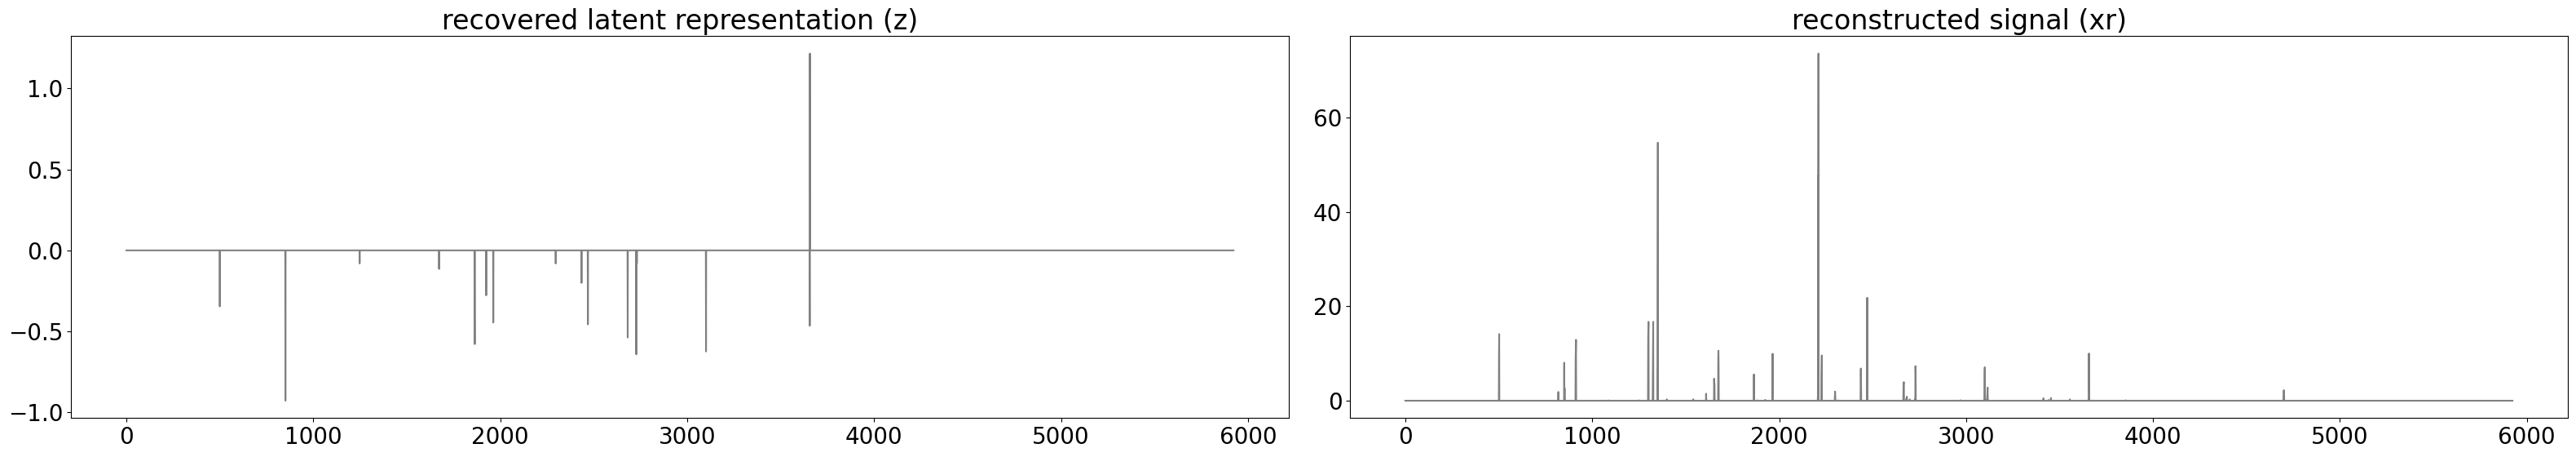


hyper-parameters:  (0.1, 'DCT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [07:58<00:00,  3.13s/it]


ACC =  0.7254901960784313

hyper-parameters:  (0.1, 'DFT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [04:19<00:00,  1.70s/it]


ACC =  0.869281045751634
Update best hparams. Acc improved from 0.738562091503268 to 0.869281045751634


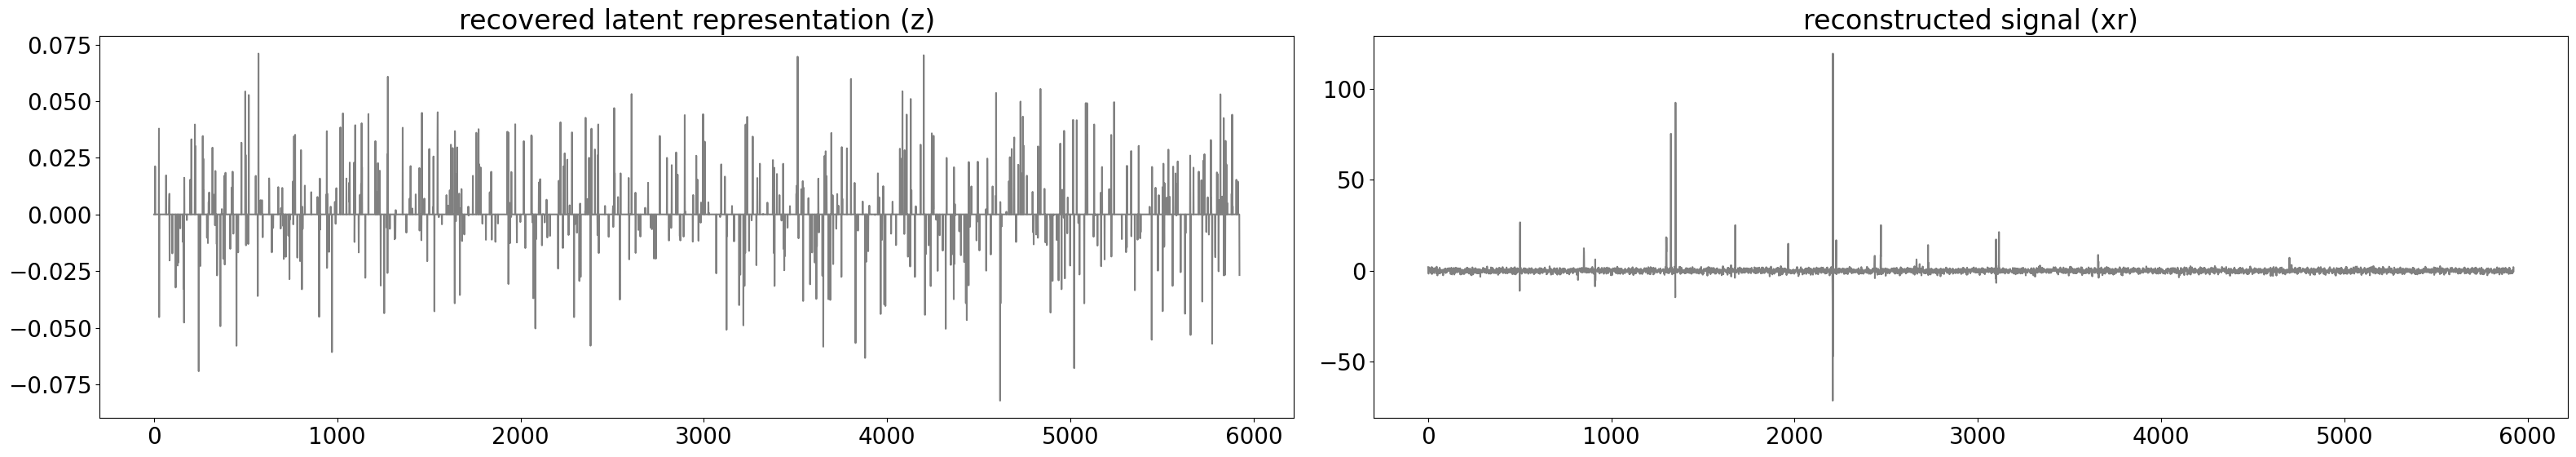


hyper-parameters:  (0.2, 'IDM', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [09:33<00:00,  3.75s/it]


ACC =  0.9281045751633987
Update best hparams. Acc improved from 0.869281045751634 to 0.9281045751633987


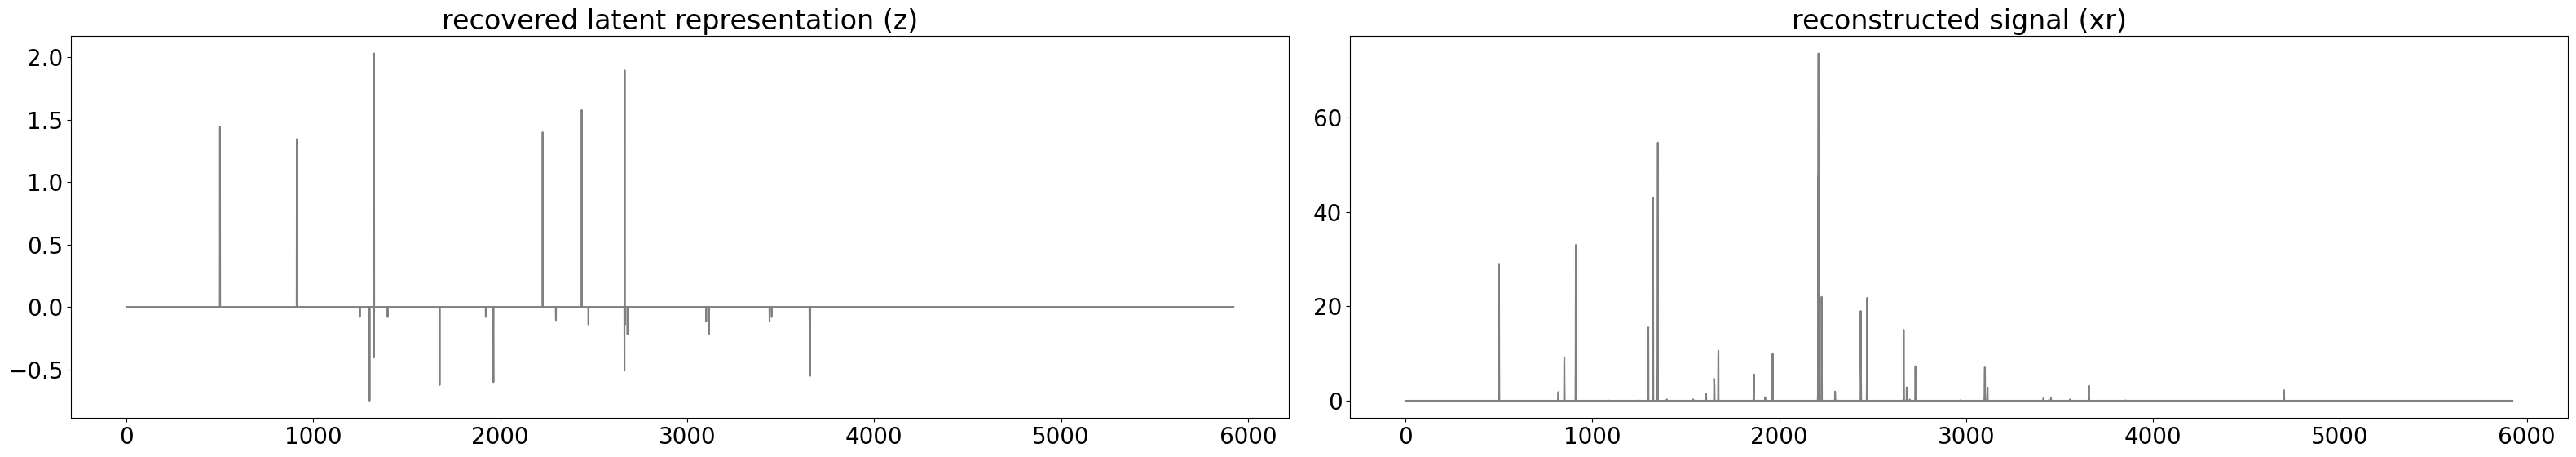


hyper-parameters:  (0.2, 'DCT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [12:55<00:00,  5.07s/it]


ACC =  0.9411764705882353
Update best hparams. Acc improved from 0.9281045751633987 to 0.9411764705882353


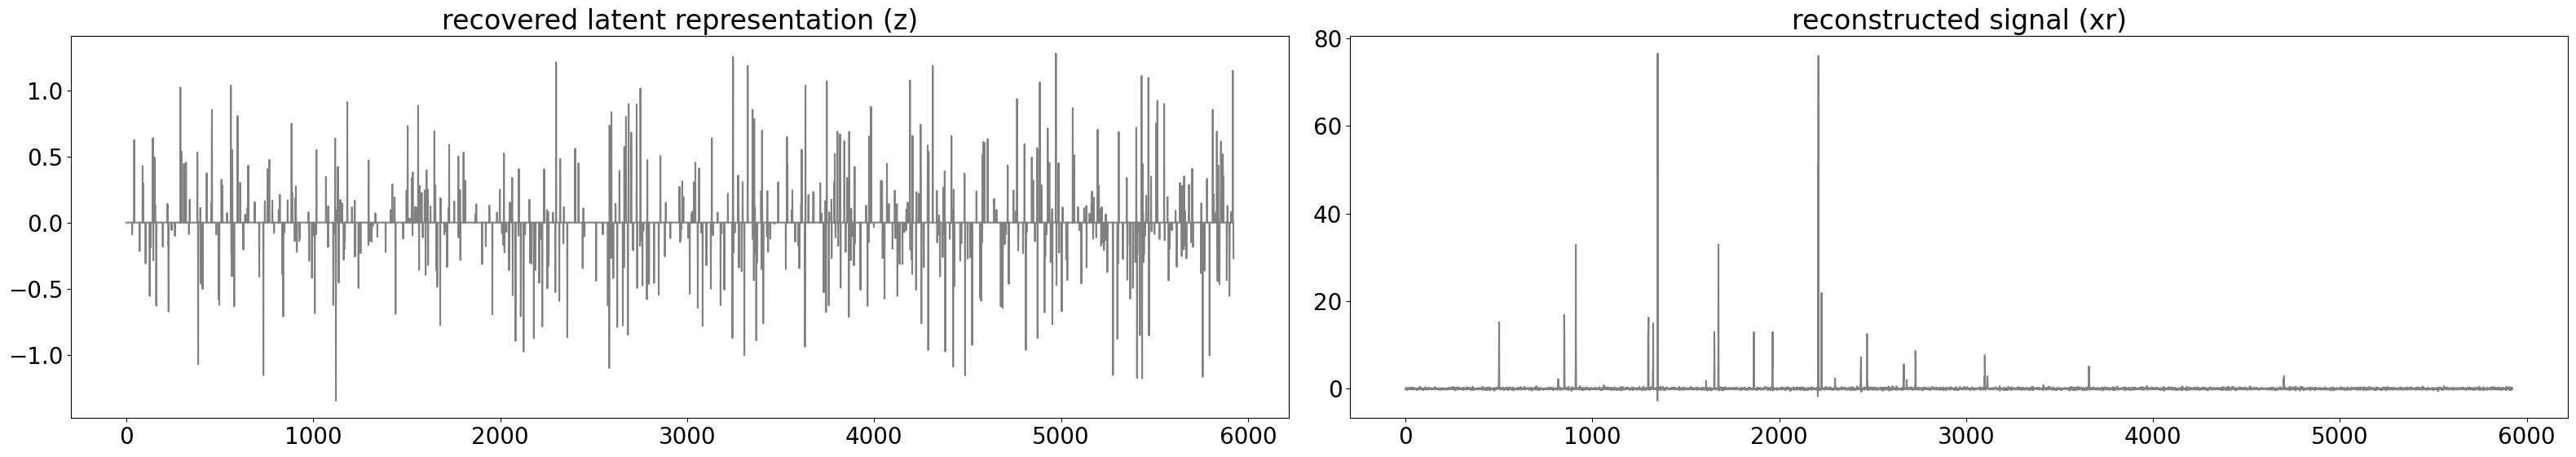


hyper-parameters:  (0.2, 'DFT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [05:49<00:00,  2.28s/it]


ACC =  0.9803921568627451
Update best hparams. Acc improved from 0.9411764705882353 to 0.9803921568627451


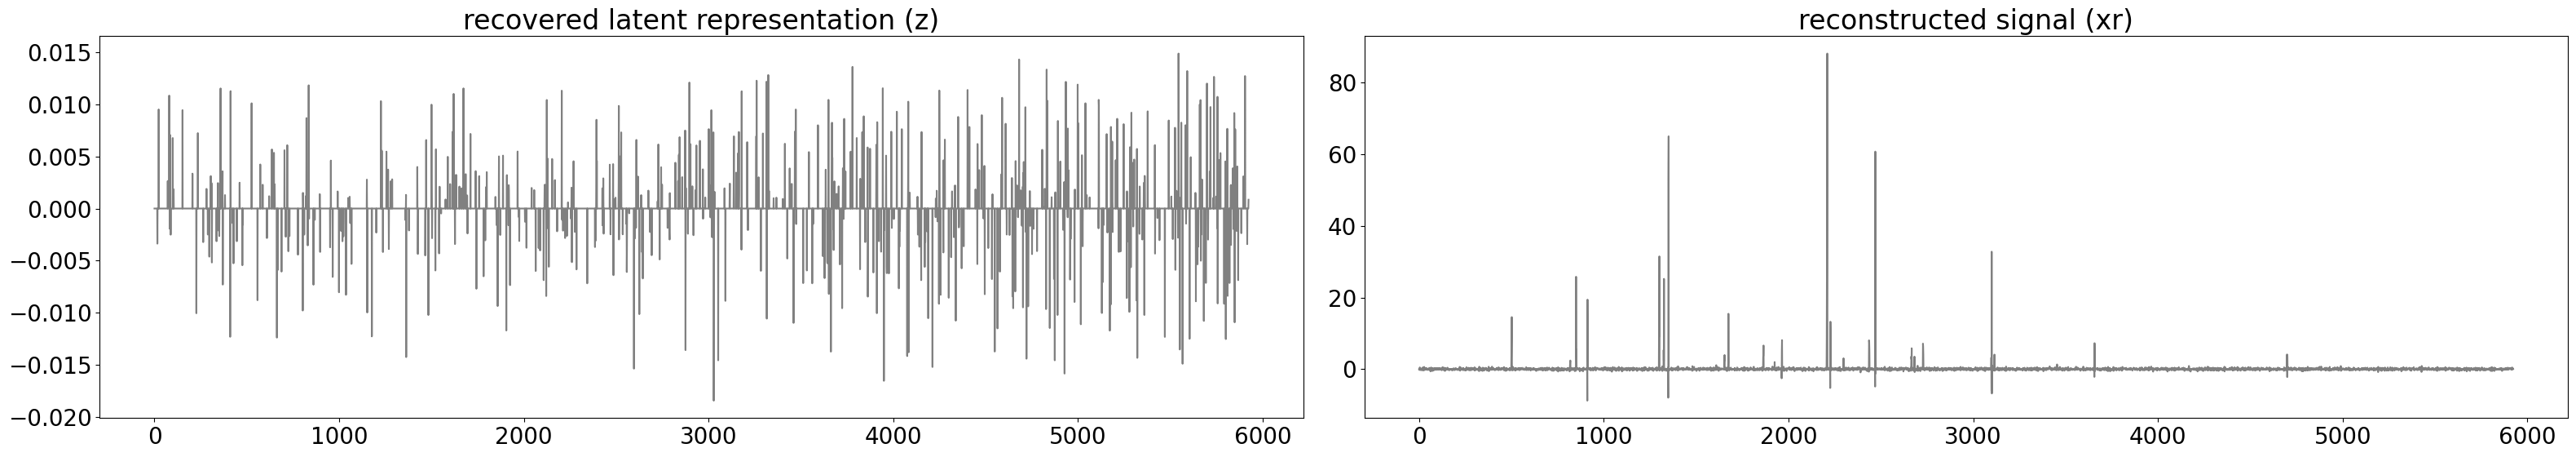


hyper-parameters:  (0.3, 'IDM', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [19:08<00:00,  7.51s/it]


ACC =  0.9673202614379085

hyper-parameters:  (0.3, 'DCT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [18:55<00:00,  7.42s/it]


ACC =  0.9803921568627451

hyper-parameters:  (0.3, 'DFT', 'OMP', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [08:24<00:00,  3.30s/it]


ACC =  0.9869281045751634
Update best hparams. Acc improved from 0.9803921568627451 to 0.9869281045751634


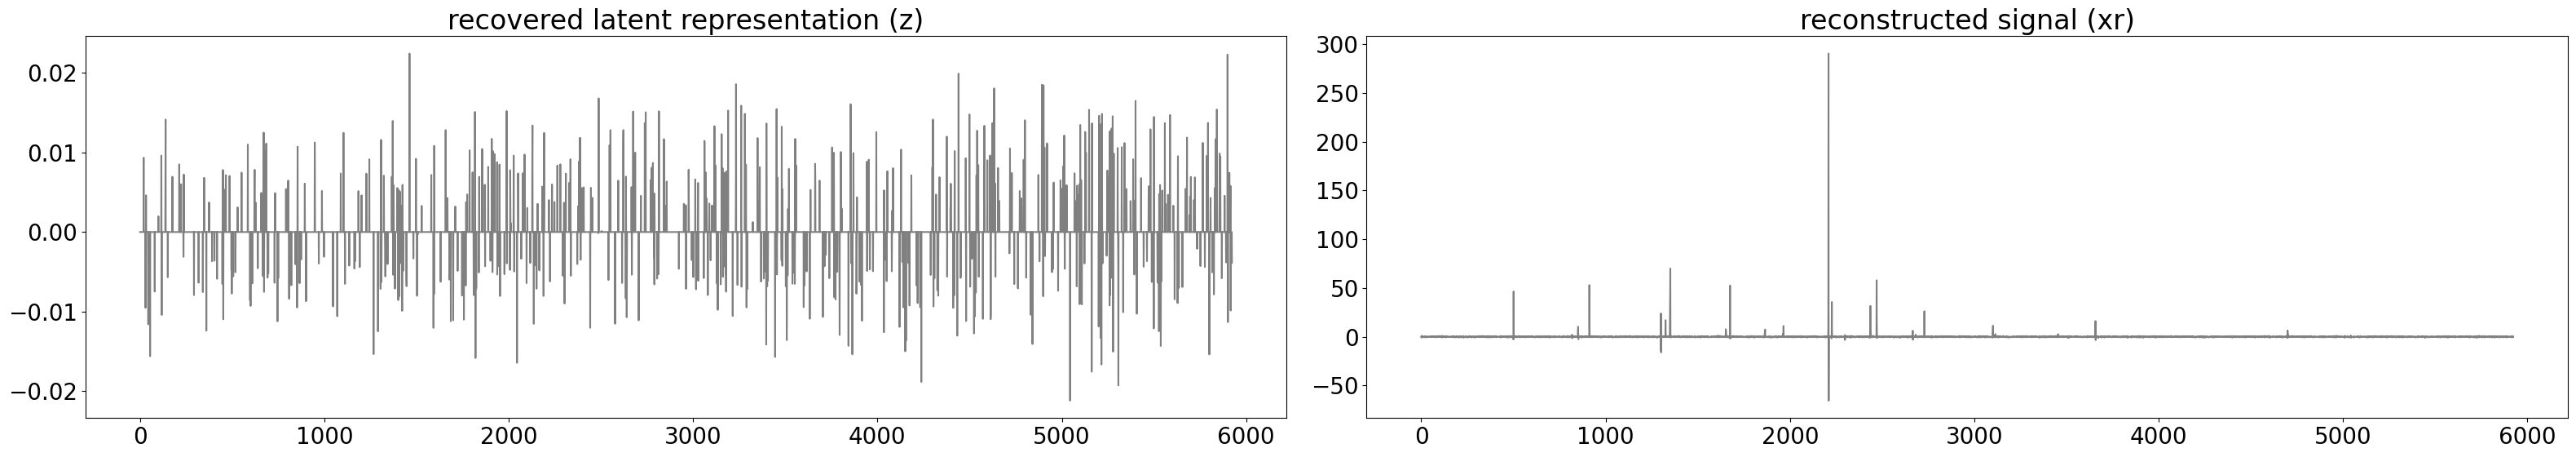

({"(0.1, 'IDM', 'OMP', 0)": 0.738562091503268,
  "(0.1, 'DCT', 'OMP', 0)": 0.7254901960784313,
  "(0.1, 'DFT', 'OMP', 0)": 0.869281045751634,
  "(0.2, 'IDM', 'OMP', 0)": 0.9281045751633987,
  "(0.2, 'DCT', 'OMP', 0)": 0.9411764705882353,
  "(0.2, 'DFT', 'OMP', 0)": 0.9803921568627451,
  "(0.3, 'IDM', 'OMP', 0)": 0.9673202614379085,
  "(0.3, 'DCT', 'OMP', 0)": 0.9803921568627451,
  "(0.3, 'DFT', 'OMP', 0)": 0.9869281045751634},
 (0.3, 'DFT', 'OMP', 0),
 0.9869281045751634)

In [19]:
from cs1 import cs

from qsi import io
X, y, X_names, desc, labels = io.load_dataset('vintage_spi', y_subset = [0,3], display = False)

cs.GridSearch_Dataset_Sensing_n_Recovery(X, y, ts = ['IDM', 'DCT', 'DFT'], 
ks = [0.1, 0.2, 0.3], 
solvers = ['OMP'], # 'BP'
L1s = [0])

(0.3, 'DCT', 'OMP', 0) : ACC = 98.7%   虽然ACC达到了较高值，但是肉眼可见重建效果并不好